<a href="https://colab.research.google.com/github/ohbseok/Project/blob/main/AI_13_%E1%84%8B%E1%85%A9%E1%84%87%E1%85%A9%E1%86%BC%E1%84%89%E1%85%A5%E1%86%A8_section2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 불러오기

In [76]:
import pandas as pd

station = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코드스테이츠/N2XX/section2 project/station.csv')
trip = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코드스테이츠/N2XX/section2 project/trip.csv.zip')
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코드스테이츠/N2XX/section2 project/weather.csv')

In [77]:
# 데이터가 너무 많아서 10프로만 사용
trip = trip.sample(frac=0.1, random_state=7) 
# replace 파라미터 : 복원추출 여부

print(trip.shape)

(66996, 11)


In [78]:
# padas display 소수점 4자리까지 출력
pd.options.display.float_format = '{:.4f}'.format

print(station.columns, trip.columns, weather.columns, sep='\n\n')

Index(['id', 'name', 'lat', 'long', 'dock_count', 'city', 'installation_date'], dtype='object')

Index(['id', 'duration', 'start_date', 'start_station_name',
       'start_station_id', 'end_date', 'end_station_name', 'end_station_id',
       'bike_id', 'subscription_type', 'zip_code'],
      dtype='object')

Index(['date', 'max_temperature_f', 'mean_temperature_f', 'min_temperature_f',
       'max_dew_point_f', 'mean_dew_point_f', 'min_dew_point_f',
       'max_humidity', 'mean_humidity', 'min_humidity',
       'max_sea_level_pressure_inches', 'mean_sea_level_pressure_inches',
       'min_sea_level_pressure_inches', 'max_visibility_miles',
       'mean_visibility_miles', 'min_visibility_miles', 'max_wind_Speed_mph',
       'mean_wind_speed_mph', 'max_gust_speed_mph', 'precipitation_inches',
       'cloud_cover', 'events', 'wind_dir_degrees', 'zip_code'],
      dtype='object')


In [79]:
trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
279488,248314,237,4/15/2014 5:32,Grant Avenue at Columbus Avenue,73,4/15/2014 5:36,Market at Sansome,77,370,Subscriber,94133
402760,800123,442,6/9/2015 13:20,Post at Kearny,47,6/9/2015 13:27,Temporary Transbay Terminal (Howard at Beale),55,109,Subscriber,94501
645700,466559,1365,9/23/2014 18:14,Santa Clara County Civic Center,80,9/23/2014 18:36,Arena Green / SAP Center,14,206,Subscriber,95051
638443,476872,265,9/30/2014 18:39,Castro Street and El Camino Real,32,9/30/2014 18:44,Mountain View Caltrain Station,28,111,Subscriber,94401
655370,452977,600,9/15/2014 9:01,San Francisco Caltrain (Townsend at 4th),70,9/15/2014 9:11,Civic Center BART (7th at Market),72,374,Subscriber,94041


In [80]:
# 불필요한 feature drop
drop_col = ['id', 'start_station_name', 'end_station_name', 'zip_code']
trip.drop(columns=drop_col, inplace=True)

# Station Data

In [81]:
station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.3297,-121.9018,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.3307,-121.8890,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.3340,-121.8949,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.3314,-121.8932,19,San Jose,8/5/2013
4,6,San Pedro Square,37.3367,-121.8941,15,San Jose,8/7/2013


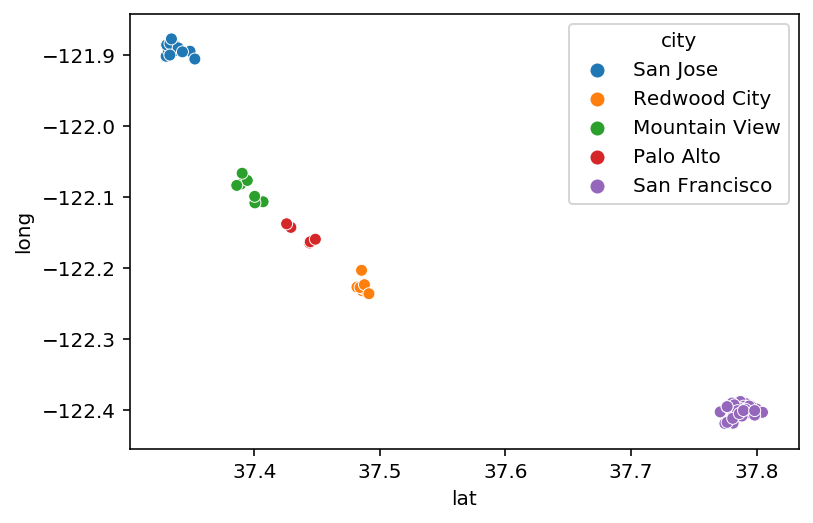

In [82]:
import seaborn as sns
sns.scatterplot(data=station, x='lat', y='long', hue='city')

In [83]:
# station lat, long 좌표 merge
trip = pd.merge(trip, station[['id', 'lat', 'long']], how='left', left_on='start_station_id', right_on='id')
trip = pd.merge(trip, station[['id', 'lat', 'long']], how='left', left_on='end_station_id', right_on='id')


In [84]:
# column name 정리
trip.drop(columns=['id_x', 'id_y'], inplace=True)

reset_name = {'lat_x':'start_lat', 'long_x':'start_long', 'lat_y':'end_lat', 'long_y':'end_long'}
trip.rename(columns=reset_name, inplace=True)


In [85]:
# 구독자, 일반고객 분류
trip['subscription_type'].replace({'Subscriber':1, 'Customer':0}, inplace=True)
# replace에 dict 넣기

In [86]:
trip.head()

,duration,start_date,start_station_id,end_date,end_station_id,bike_id,subscription_type,start_lat,start_long,end_lat,end_long
0,237,4/15/2014 5:32,73,4/15/2014 5:36,77,370,1,37.7985,-122.4072,37.7896,-122.4008
1,442,6/9/2015 13:20,47,6/9/2015 13:27,55,109,1,37.7890,-122.4035,37.7898,-122.3946
2,1365,9/23/2014 18:14,80,9/23/2014 18:36,14,206,1,37.3526,-121.9057,37.3327,-121.9001
3,265,9/30/2014 18:39,32,9/30/2014 18:44,28,111,1,37.3860,-122.0837,37.3944,-122.0767
4,600,9/15/2014 9:01,70,9/15/2014 9:11,72,374,1,37.7766,-122.3953,37.7810,-122.4117


# Trip Data
haversine : 위경도로 거리 구하는 라이브러리

In [87]:
!pip install haversine
from haversine import haversine

trip['distance_total'] = trip.apply(lambda row: haversine((row['start_lat'], row['start_long']),
                                                        (row['end_lat'], row['end_long'])), axis=1)

trip['distance_lat'] = trip.apply(lambda row: haversine((row['start_lat'], row['start_long']),
                                                        (row['end_lat'], row['start_long'])), axis=1)

trip['distance_long'] = trip.apply(lambda row: haversine((row['start_lat'], row['start_long']),
                                                        (row['start_lat'], row['end_long'])), axis=1)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
# 직선거리 a+b
trip['distance_lat+long'] = trip['distance_lat'] + trip['distance_long']

coords = trip[['start_lat',	'start_long',	'end_lat','end_long']]
trip.drop(columns=['distance_lat', 'distance_long','start_lat',	'start_long',	'end_lat','end_long'], inplace=True)

In [89]:
len(trip[(trip['start_station_id'] == trip['end_station_id'])])


2372

In [90]:
trip = trip[~(trip['start_station_id'] == trip['end_station_id'])]
# 원래 station으로 돌아오는거 (23900개 - 3.5%, 이상치 제거)

In [91]:
from datetime import datetime, date, time

# 월,일,연, 시,분 으로 타입 변경
trip['start_date'] = pd.to_datetime(trip['start_date'], format='%m/%d/%Y %H:%M')
trip

,duration,start_date,start_station_id,end_date,end_station_id,bike_id,subscription_type,distance_total,distance_lat+long
0,237,2014-04-15 05:32:00,73,4/15/2014 5:36,77,370,1,1.1394,1.5546
1,442,2015-06-09 13:20:00,47,6/9/2015 13:27,55,109,1,0.7789,0.8609
2,1365,2014-09-23 18:14:00,80,9/23/2014 18:36,14,206,1,2.2694,2.7131
3,265,2014-09-30 18:39:00,32,9/30/2014 18:44,28,111,1,1.1187,1.5496
4,600,2014-09-15 09:01:00,70,9/15/2014 9:11,72,374,1,1.5302,1.9408
...,...,...,...,...,...,...,...,...,...
66991,420,2014-06-23 19:05:00,70,6/23/2014 19:12,68,589,1,1.0486,1.4243
66992,1311,2014-09-02 18:32:00,80,9/2/2014 18:54,14,44,1,2.2694,2.7131
66993,306,2014-07-23 07:41:00,60,7/23/2014 7:47,41,440,1,1.1235,1.3730
66994,640,2014-11-06 21:37:00,76,11/6/2014 21:48,67,327,1,1.5334,2.1684


In [92]:
def set_season(month):
  if 3 <= month <= 5 :
    return 'spring'
  elif 6 <= month <= 8 :
    return 'summer'  
  elif 9 <= month <= 11 :
    return 'fall'  
  elif  (month <= 2) or (month == 12) :
    return 'winter'   

In [93]:
trip['season'] = trip['start_date'].dt.month.apply(set_season)
trip['season'].value_counts(normalize=True)

summer   0.2850
spring   0.2567
fall     0.2532
winter   0.2050
Name: season, dtype: float64

In [95]:
def what_day(date):
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

    # 들어온 date(YYYY_MM_DD).weekday() -> 0-6까지 매핑된 결과로 출력 그래서 리스트에 변환
    day = date.weekday()
    return days[day]


In [96]:
trip['day'] = trip['start_date'].dt.date.apply(what_day)
trip['day'].value_counts(normalize=True)

Tue   0.1846
Wed   0.1831
Thu   0.1786
Mon   0.1751
Fri   0.1636
Sat   0.0611
Sun   0.0537
Name: day, dtype: float64

In [97]:
def what_time(oclock):
  # input에 time 넣으면 안됨, 함수라서
  six = time(6)
  ten = time(10)
  seventeen = time(17)
  twenty_one = time(21)

  if (six <= oclock < ten) or (seventeen <= oclock < twenty_one) :
    return 'commute'
  elif (oclock < six) or (twenty_one <= oclock) :
    return 'night'  
  elif ten <= oclock < seventeen :
    return 'day'   

In [98]:
trip['time'] = trip['start_date'].dt.time.apply(what_time)

In [99]:
trip['time'].value_counts(1)

commute   0.5937
day       0.3591
night     0.0472
Name: time, dtype: float64

In [100]:
# 최소가 60s -> min으로 변환
# 나눈 값(오른쪽)을 왼쪽 변수에 할당
trip['duration'] /= 60

# 너무 큰 이상치 제거 

trip['duration'].describe()

count   64624.0000
mean       14.8551
std        89.0582
min         1.0167
25%         5.7167
50%         8.5167
75%        12.2167
max     11941.3333
Name: duration, dtype: float64

In [101]:
trip['duration'].quantile(0.99)
# 상위 1프로가 216분 -> 240분(4시간)으로 제한
trip = trip[trip['duration'] <= 240]

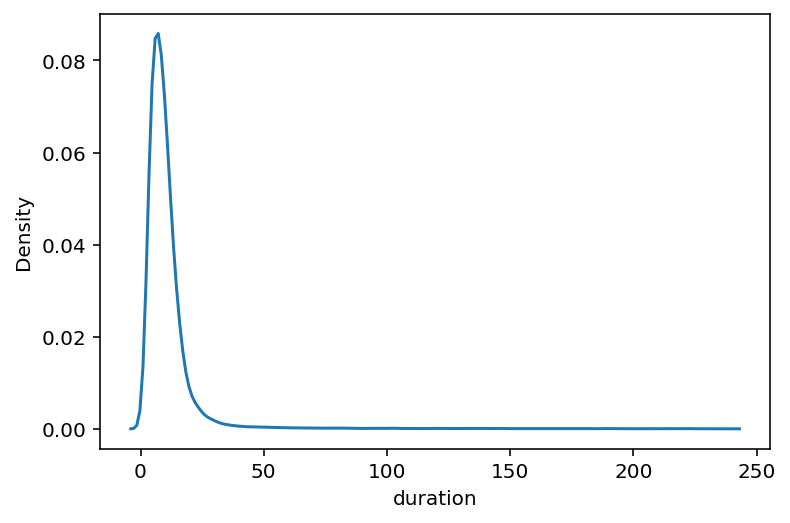

In [102]:
sns.kdeplot(trip['duration'])

# Weather Data

Mapping of Zip Codes ans City names.  
95113 - San Jose.  
94301 - Palo Alto.  
94107 - San Francisco.  
94063 - Redwood City.  
94041 - Mountain View.  


In [103]:
# 우린 san francisco니까 used 94107
# weather = weather[weather['zip_code'] == 94107]

weather.date = pd.to_datetime(weather.date, format='%m/%d/%Y')
weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            3665 non-null   datetime64[ns]
 1   max_temperature_f               3661 non-null   float64       
 2   mean_temperature_f              3661 non-null   float64       
 3   min_temperature_f               3661 non-null   float64       
 4   max_dew_point_f                 3611 non-null   float64       
 5   mean_dew_point_f                3611 non-null   float64       
 6   min_dew_point_f                 3611 non-null   float64       
 7   max_humidity                    3611 non-null   float64       
 8   mean_humidity                   3611 non-null   float64       
 9   min_humidity                    3611 non-null   float64       
 10  max_sea_level_pressure_inches   3664 non-null   float64       
 11  mean

In [104]:
print('이상기후 :',weather.events.unique())

# 범주 전처리
weather.loc[weather.events == 'rain', 'events'] = "Rain"
weather.loc[weather.events.isnull(), 'events'] = "Normal"

이상기후 : [nan 'Fog' 'Rain' 'Fog-Rain' 'rain' 'Rain-Thunderstorm']


In [105]:
events = pd.get_dummies(weather.events)
# 인코딩 해줄건데 굳이 겟더미 써야하나..
weather = weather.merge(events, left_index = True, right_index = True)
weather = weather.drop(columns=['events','zip_code'])

In [106]:
from scipy.stats.stats import pearsonr  

print(pearsonr(
    weather.max_wind_Speed_mph[weather.max_gust_speed_mph >= 0], 
    weather.max_gust_speed_mph[weather.max_gust_speed_mph >= 0]
))
# 피어슨 상관계수, p_value 순서

(0.5712872209228649, 2.0098715720342725e-239)


In [107]:
# 둘의 상관관계가 높으니, max_gust_speed 결측치를 max_wind_spped로 그룹 후 median으로 채우기
weather.loc[weather.max_gust_speed_mph.isnull(), 'max_gust_speed_mph'] = \
weather.groupby('max_wind_Speed_mph').max_gust_speed_mph.apply(lambda x: x.fillna(x.median()))

In [108]:
# 강수량은 int, T(str) 있음
weather.precipitation_inches = pd.to_numeric(weather.precipitation_inches, errors = 'coerce')
# Ture(비온 날) - 강수량은 모르니까 Nan으로 대치(errors 파라미터)

# Nan 값을 median으로 대치
weather.loc[weather.precipitation_inches.isnull(), 
            'precipitation_inches'] = weather[weather.precipitation_inches.notnull()].precipitation_inches.median()

# 나머지 결측치도 median으로 
weather.fillna(weather.median(), inplace=True)

weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,Fog,Fog-Rain,Normal,Rain,Rain-Thunderstorm
0,2013-08-29,74.0000,68.0000,61.0000,61.0000,58.0000,56.0000,93.0000,75.0000,57.0000,...,11.0000,28.0000,0.0000,4.0000,286.0000,0,0,1,0,0
1,2013-08-30,78.0000,69.0000,60.0000,61.0000,58.0000,56.0000,90.0000,70.0000,50.0000,...,13.0000,35.0000,0.0000,2.0000,291.0000,0,0,1,0,0
2,2013-08-31,71.0000,64.0000,57.0000,57.0000,56.0000,54.0000,93.0000,75.0000,57.0000,...,15.0000,31.0000,0.0000,4.0000,284.0000,0,0,1,0,0
3,2013-09-01,74.0000,66.0000,58.0000,60.0000,56.0000,53.0000,87.0000,68.0000,49.0000,...,13.0000,29.0000,0.0000,4.0000,284.0000,0,0,1,0,0
4,2013-09-02,75.0000,69.0000,62.0000,61.0000,60.0000,58.0000,93.0000,77.0000,61.0000,...,12.0000,30.0000,0.0000,6.0000,277.0000,0,0,1,0,0


In [109]:
trip.loc[:, 'date'] = pd.to_datetime(trip['start_date'].dt.date)

In [110]:
trip = pd.merge(trip, weather, how='left', on='date')

In [111]:
trip.drop(columns=['start_date', 'end_date', 'date'], inplace=True)

In [116]:
# 최종 데이터 셋
trip.head(10)

,duration,start_station_id,end_station_id,bike_id,subscription_type,distance_total,distance_lat+long,season,day,time,...,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,Fog,Fog-Rain,Normal,Rain,Rain-Thunderstorm
0,3.9500,73,77,370,1,1.1394,1.5546,spring,Tue,night,...,8.0000,30.0000,0.0000,4.0000,275.0000,0,0,1,0,0
1,3.9500,73,77,370,1,1.1394,1.5546,spring,Tue,night,...,5.0000,17.0000,0.0000,2.0000,291.0000,0,0,1,0,0
2,3.9500,73,77,370,1,1.1394,1.5546,spring,Tue,night,...,8.0000,21.0000,0.0000,2.0000,349.0000,0,0,1,0,0
3,3.9500,73,77,370,1,1.1394,1.5546,spring,Tue,night,...,6.0000,22.0000,0.0000,3.0000,359.0000,0,0,1,0,0
4,3.9500,73,77,370,1,1.1394,1.5546,spring,Tue,night,...,6.0000,20.0000,0.0000,3.0000,310.0000,0,0,1,0,0
5,7.3667,47,55,109,1,0.7789,0.8609,summer,Tue,day,...,6.0000,32.0000,0.0000,6.0000,294.0000,0,0,1,0,0
6,7.3667,47,55,109,1,0.7789,0.8609,summer,Tue,day,...,6.0000,13.0000,0.0000,7.0000,337.0000,0,0,1,0,0
7,7.3667,47,55,109,1,0.7789,0.8609,summer,Tue,day,...,10.0000,28.0000,0.0000,7.0000,360.0000,0,0,1,0,0
8,7.3667,47,55,109,1,0.7789,0.8609,summer,Tue,day,...,6.0000,28.0000,0.0000,1.0000,336.0000,0,0,1,0,0
9,7.3667,47,55,109,1,0.7789,0.8609,summer,Tue,day,...,5.0000,24.0000,0.0000,6.0000,296.0000,0,0,1,0,0



# Modeling

In [36]:
from sklearn.model_selection import train_test_split

def split(df):
    features = df.columns.drop('duration')
    target = 'duration'

    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], train_size = 0.8, test_size = 0.2, random_state = 42)
  
    return X_train, X_test, y_train, y_test

In [37]:
X_train, X_test, y_train, y_test = split(trip)

In [38]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(256992, 35) (64248, 35) (256992,) (64248,)


In [39]:
baseline = y_train.mean() 
# mean = 12.6, median = 8.55

errors = baseline - y_train
# int - pd.Series 해도 Series로 출력되네

In [40]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

y_pred = [baseline] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
rmse = mean_squared_error(y_train, y_pred) ** 0.5
r2 = r2_score(y_train, y_pred)

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R^2: {r2:.2f}")
# 평균을 회귀직선으로 했으니 R2는 0이 되네

MAE: 6.23, RMSE: 15.24, R^2: -0.00


In [41]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

!pip install category_encoders
from category_encoders import OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import randint, uniform

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [42]:
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) 
X_test_encoded = encoder.transform(X_test) 

xgbr = XGBRegressor(
    n_estimators=1000,
    objective='reg:squarederror', 
    learning_rate=0.2,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_test_encoded, y_test)]

xgbr.fit(X_train_encoded, y_train,
          eval_metric='rmse', 
          eval_set=eval_set,
          early_stopping_rounds=20
         )
          # eval_set=[(X_test, y_test)] #list(tuple()) 로 넣어줄 것

[0]	validation_0-rmse:16.9737	validation_1-rmse:17.0646
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:15.798	validation_1-rmse:15.8929
[2]	validation_0-rmse:14.9836	validation_1-rmse:15.0781
[3]	validation_0-rmse:14.427	validation_1-rmse:14.5275
[4]	validation_0-rmse:14.052	validation_1-rmse:14.1492
[5]	validation_0-rmse:13.7999	validation_1-rmse:13.8991
[6]	validation_0-rmse:13.6306	validation_1-rmse:13.7335
[7]	validation_0-rmse:13.5161	validation_1-rmse:13.6173
[8]	validation_0-rmse:13.4348	validation_1-rmse:13.535
[9]	validation_0-rmse:13.3798	validation_1-rmse:13.4775
[10]	validation_0-rmse:13.3184	validation_1-rmse:13.4216
[11]	validation_0-rmse:13.2891	validation_1-rmse:13.3953
[12]	validation_0-rmse:13.2687	validation_1-rmse:13.377
[13]	validation_0-rmse:13.2513	validation_1-rmse:13.359
[14]	validation_0-rmse:13.2404	validation_1-rmse:13.3504
[1

XGBRegressor(learning_rate=0.2, n_estimators=1000, n_jobs=-1,
             objective='reg:squarederror')

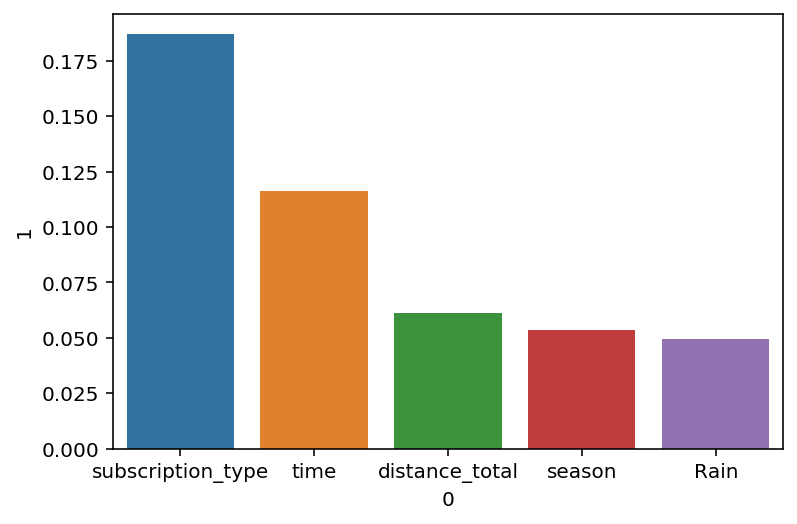

In [72]:
# clf.best_estimator_.named_steps('randomforestclassifier').features_importances_
feature_imp = xgbr.feature_importances_

sort_feature = sorted(
    list(zip(X_train.columns, feature_imp)), key=lambda x:x[1], reverse=True
)[:5]
sort_feature = pd.DataFrame(sort_feature)

sns.barplot(data=sort_feature, x=sort_feature.iloc[:, 0], y=sort_feature.iloc[:, 1])

In [57]:
y_pred_final = xgbr.predict(X_test_encoded)
print('R^2 :', r2_score(y_test, y_pred_final))

R^2 : 0.37828155607364455


In [45]:
mae_final = mean_absolute_error(y_test, y_pred_final)
rmse_final = mean_squared_error(y_test, y_pred_final) ** 0.5
r2_final = r2_score(y_test, y_pred_final)

print(f"final - MAE: {mae_final:.2f}, RMSE: {rmse_final:.2f}, R^2: {r2_final:.2f}")
print(f"baseline - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R^2: {r2:.2f}")


final - MAE: 4.17, RMSE: 12.10, R^2: 0.38
baseline - MAE: 6.23, RMSE: 15.24, R^2: -0.00


In [46]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144

!pip install pdpbox
from pdpbox.pdp import pdp_isolate, pdp_plot

# feature = 'subscription_type'
feature = 'time'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
isolated = pdp_isolate(
    model=xgbr, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

TypeError: ignored

Other


In [ ]:
final_model = clf.best_estimator_
y_pred_final = final_model.predict(X_test)

In [ ]:
def fit(X_train, y_train):

    pipeline = make_pipeline(
        # TargetEncoder(),
        OrdinalEncoder(), 
        SimpleImputer(), 
        XGBRegressor(random_state=2, n_jobs=-1)
    )

    dists = {
      # 'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], # int로 넣으면 error(bug)
      # 'targetencoder__min_samples_leaf': randint(1, 10),     
      'simpleimputer__strategy': ['mean', 'median'], 
      'xgbregressor__n_estimators': randint(50, 300),
      'xgbregressor__max_depth': range(1, 20, 2), 
      # 'xgbregressor__learning_rate': [0, 0.01, 0.05, 0.1, 0.3, 0.5, 1], 
      'xgbregressor__scale_pos_weight' : [1, 3, 5]   
      }

    clf = RandomizedSearchCV(
        pipeline, 
        param_distributions=dists, 
        n_iter=5, 
        cv=3, 
        scoring='neg_root_mean_squared_error',  
        verbose=1, # 이거 뭐였더라
        n_jobs=-1
    )
    
    # YOUR CODE ENDS HERE

    # clf.fit(X_train, y_train)
    clf.fit(X_train, y_train,
            # early_stopping_rounds=20,
            # eval_metric='rmse',
            # eval_set=[(X_test, y_test)] #list(tuple()) 로 넣어줄 것
            )
    print("Optimal Hyperparameter:", clf.best_params_)
    print("AUC:", clf.best_score_)

    return clf

In [ ]:
clf = fit(X_train, y_train)

In [ ]:
clf.fit(X_train, y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='rmse',
            eval_set=[(X_test, y_test)] #list(tuple()) 로 넣어줄 것
            )

In [ ]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
  
# Load the data
dataset = pd.read_csv("boston_house.csv")
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]
  
# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)
  
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(train_X, train_y)
  
# Predict the model
pred = xgb_r.predict(test_X)
  
# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
  
# Load the data
dataset = pd.read_csv("boston_house.csv")
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]
  
# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                      test_size = 0.3, random_state = 123)
  
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
train_dmatrix = xg.DMatrix(data = train_X, label = train_y)
test_dmatrix = xg.DMatrix(data = test_X, label = test_y)
  
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:linear"}
  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
  
# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))